In [1]:
import subprocess
import sys

COLAB = "google.colab" in sys.modules


def _install(package):
    if COLAB:
        ans = input(f"Install { package }? [y/n]:")
        if ans.lower() in ["y", "yes"]:
            subprocess.check_call(
                [sys.executable, "-m", "pip", "install", "--quiet", package]
            )
            print(f"{ package } installed!")


def _colab_install_missing_deps(deps):
    import importlib

    for dep in deps:
        if importlib.util.find_spec(dep) is None:
            if dep == "iris":
                dep = "scitools-iris"
            _install(dep)


deps = ["gliderpy", "gsw"]
_colab_install_missing_deps(deps)

# Adding a plotting interface gliderpy

Created: 2024-08-29

Updated: 2025-04-15

As part of Googe Summer of Code 2024, a new plotting interface was added to `gliderpy` to make it easier to expore the data. In this notebook we will walk through the new functions one can use to quickly visualize glider data.

The new plotting interface consists of `plot_ track`, `plot_ctd`, and `plot_transect` for plotting the glider track, single cast (glider dive), or a vertical transect respectively. Let's take a look on how to use them.

First we will load a glider dataset with `gliderpy`. More information about gliderpy can be found [in the docs](https://ioos.github.io/gliderpy/).

In [2]:
import matplotlib.pyplot as plt
from gliderpy.fetchers import GliderDataFetcher

glider_grab = GliderDataFetcher()

dataset_id = "whoi_406-20160902T1700"
glider_grab.dataset_ids = [dataset_id]
dfs = glider_grab.to_pandas()

In [3]:
df = dfs[dataset_id]

Let's start with the `plot_track` method to check a map with theis glider's track.

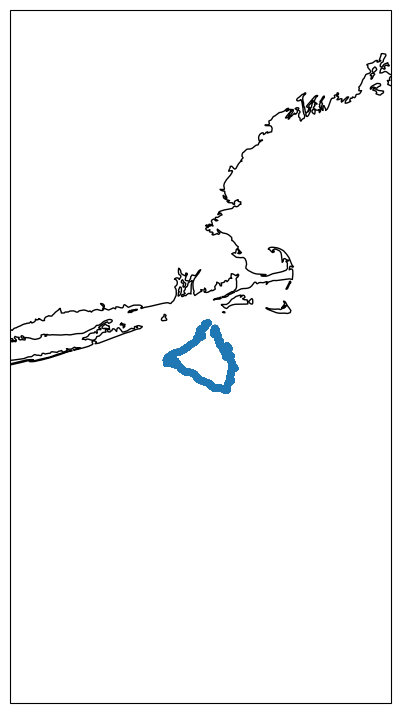

In [4]:
fig, ax = df.plot_track()

This is essentially a cartopy figure and one can customize it `further` to add tick marks, change coastline, land features, etc. However, the idea is to have `gliderpy`'s defaults to be just a bare minimum for a quick visualization.

Imagine if you are inspection the dives for some QA/QC, like checking for spikes. You can use the `plot_ctd` to group all the casts and plot them using their `profile_number` in grouped `DataFrame`. Let's inspect the first 10 profiles.

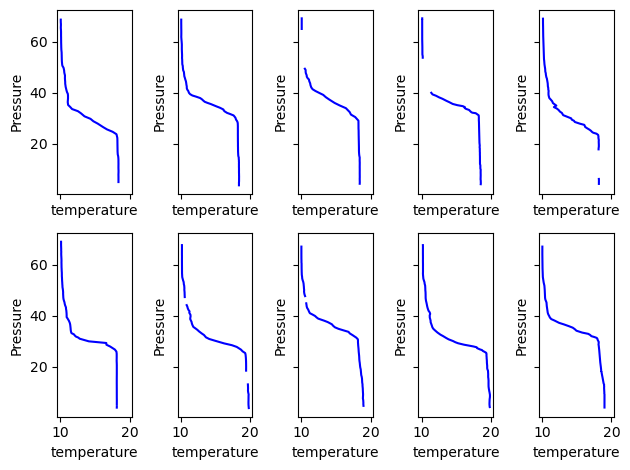

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

for k, ax in enumerate(axes.ravel()):
    df.plot_cast(ax=ax, profile_number=k, var="temperature", color="blue")

fig.tight_layout()

As we can see from the gaps in some of the progiles this dataset was aready QA/QC'ed.

Note that all the methods accept an `ax` argument. With that we can create tweak our figures. Here is another example, let's plot two variables from the same cast.

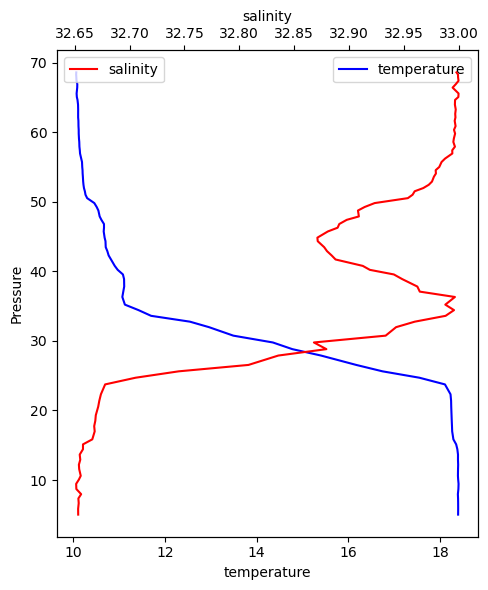

In [6]:
fig, ax0 = df.plot_cast(profile_number=0, var="temperature", color="blue")

ax1 = ax0.twiny()
df.plot_cast(profile_number=0, var="salinity", color="red", ax=ax1)

ax0.legend()
ax1.legend()

fig.tight_layout()

We can check a whole transec with the `plot_transect` method.

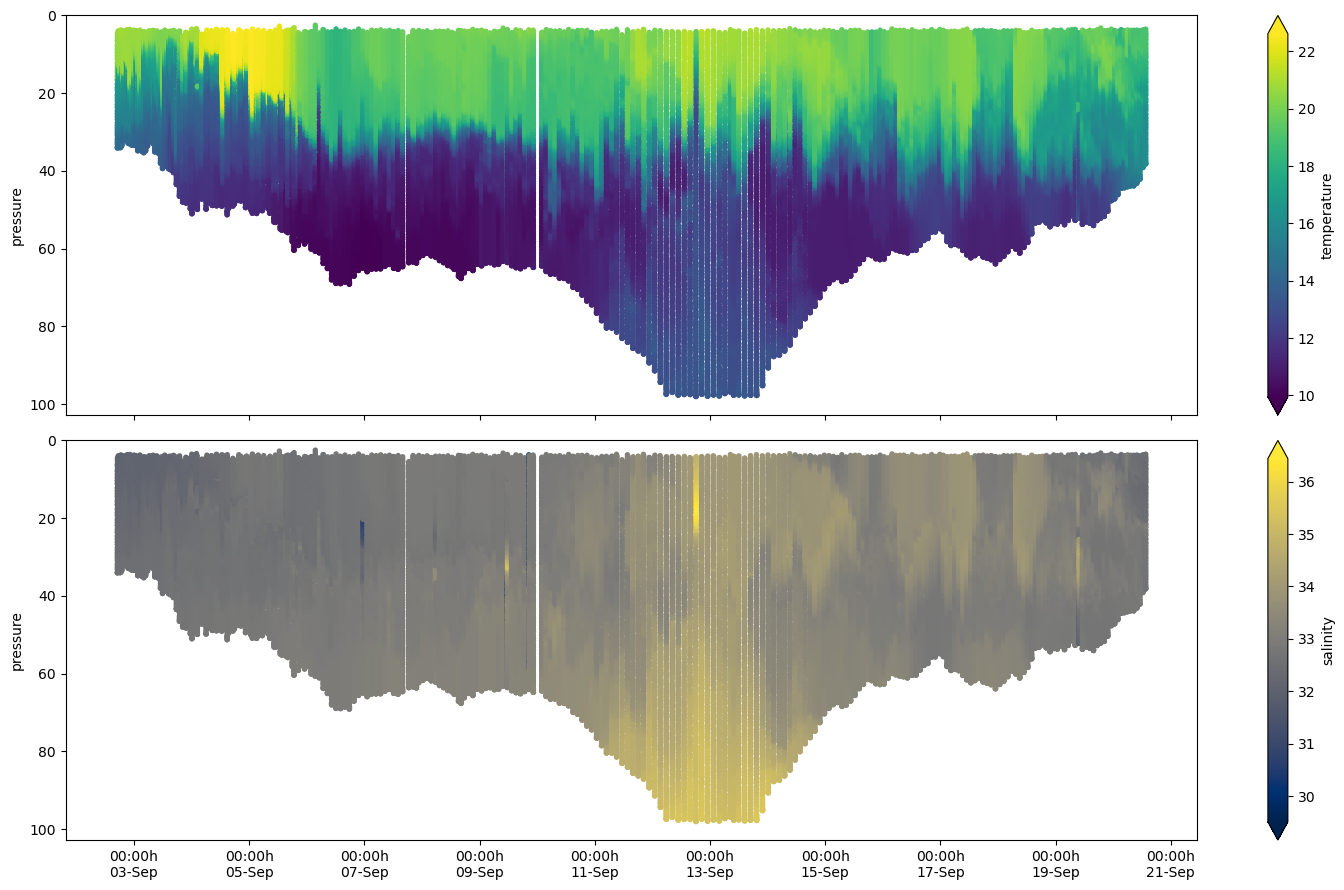

In [7]:
fig, (ax0, ax1) = plt.subplots(
    figsize=(15, 9),
    nrows=2,
    sharex=True,
    sharey=True,
)

df.plot_transect(var="temperature", ax=ax0, cmap="viridis")
df.plot_transect(var="salinity", ax=ax1, cmap="cividis")

fig.tight_layout()

We hope this new functionality is useful!